In [1]:
#1v;2v;3v;4v;5v;6v

In [465]:
#Блок import-ов
from random import *
import numpy as np
from scipy.stats import uniform
import os
from math import sqrt
import matplotlib.pyplot as plt
from scipy.special import factorial 
from scipy.stats import chisquare
from scipy.stats import ttest_ind
from scipy.stats import f
from scipy.stats import probplot
from scipy.stats import norm
from scipy.stats import invgauss
from time import time
from scipy.stats.distributions import chi2
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import cauchy


# Задание №1

### Блок обработки

In [258]:
#Генератор СВ Бернулли
def Bernrnd(p,varargin):
    if p > 1 or p < 0:
        os.error("p = %4.2f is out of bounds [0,1]",p)
    return uniform.rvs(size = varargin) < p

In [260]:
#Генератор Биномиальной СВ
#Принимает на вход вероятность, длину входного вектора распр. Бернулли и длину выходного вектора
def Binomial(p,n,m):
    if p > 1 and p < 0:
        print("p = ",p, " is out of bounds [0,1]")
        return "Err"
    d = Bernrnd(p,[n,m])
    res = d.sum(axis = 0)  
    return res

In [261]:
#Генератор Геометрической СВ       
def Geomrnd(p,n):
    v = np.zeros(n)
    i_v = np.zeros(n)
    v_ones = np.ones(n)
    while not i_v.all():
        b_v = Bernrnd(p,n)
        i_v += b_v
        v += v_ones*(i_v == 0)
    return v        

### Блок вывода/визуализации

### Задание №1.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


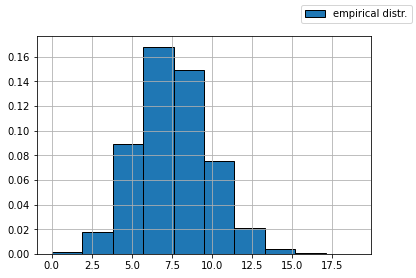

In [278]:
#1.1
p_b = 1/4 #значение вероятности для Биномиального генератора
n_b = 30 #число СВ Бернулли для Биномиального генератора
n_cross = 10000 #число испытаний*

z = Binomial(p_b,n_b,n_cross)
fig = plt.figure()
plt.hist(z,10,density = 1, label = 'empirical distr.', edgecolor = 'black')
plt.grid(True)
fig.legend()
#plt.savefig('1_1.eps')

### Задание №1.2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


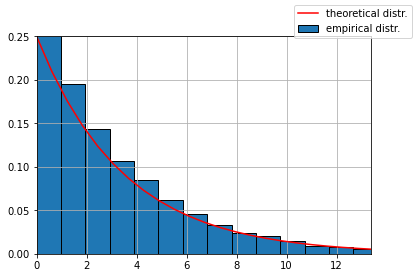

In [287]:
#1.2
p_g = 1/4 #значение вероятности для Геометрического генератора
n_g = 10000 #число СВ Бернулли для Геометрического генератора
z = Geomrnd(p_g,n_g)
fig = plt.figure()
plt.hist(z,40,density = 1, label = 'empirical distr.', edgecolor = 'black')
plt.grid(True)
#plt.title('Гистограмма Геометрического распределения.')

x = np.linspace(0, 30)
y = p_g*(1 - p_g)**(x)
plt.plot(x,y,'r', label = 'theoretical distr.')
plt.axis([0, ((1 - p_g)/p_g + 3 * sqrt((1 - p_g)/p_g**2)), 0, max(y)])
fig.legend()
#plt.savefig('1_2.eps')
#plt.savefig('Geomrnd.eps')

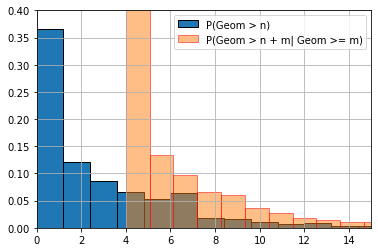

In [324]:
#Свойство отсутствия памяти
#Для удобства полагаем, что m > n
p_g = 1/4 #значение вероятности для Геометрического генератора
n_g = 10000 #число СВ Бернулли для Геометрического генератора
m_m = 4
n_m = 0
z = Geomrnd(p_g,n_g)
z = np.delete(z,np.where(z < n_m))
fig = plt.figure()
plt.hist(z,30,density = 1, label = 'P(Geom > n)', edgecolor = 'black')
z = np.delete(z,np.where(z < n_m + m_m))
plt.hist(z,30,density=1, alpha = 0.5, label = 'P(Geom > n + m| Geom >= m)', edgecolor = 'red')
plt.grid(True)
plt.legend()
plt.axis([0,15,0,0.4])#Верхняя граница по оси абсцисс была выбрана по правилу из пункта 11(с), но
#выглядело не очень красиво, поэтому я решил уменьшить до 0.6
#plt.savefig('1_3.pdf')



### Задание №1.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


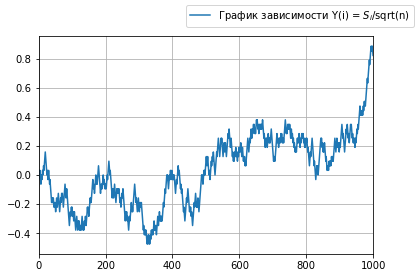

In [89]:
n = 1000 #количество испытаний для Задания №1.3
k = sqrt(n)
mas = Bernrnd(1/2,n)
mas = np.array(mas)
mas = 2*(mas - (1/2)*np.ones(n))
mas = np.cumsum(mas)
mas = mas/k
fig = plt.figure()
plt.plot(range(0,n),mas,label = 'График зависимости Y(i) = $S_i$/sqrt(n)')
plt.grid(True)
plt.xlim(left = 0, right = n)
fig.legend()
#plt.savefig('1_4.eps')

# Задание №2

### Блок обработки

In [548]:
#Генератор F аналитической лестницы кантора
def Canrnd(n = 1, eps = 1e-10):
    m = round(-np.log(eps)/np.log(3))
    bern = np.matrix(Bernrnd(1/2,[n,m]))
    deg = -1 * np.arange(1,m + 1,1)
    deg = deg.transpose()
    p_1 = np.matrix(np.power(3,deg, dtype = np.float64).transpose())
    x = 2 * bern * p_1.transpose() 
    p_1 = np.matrix(np.power(2,deg, dtype = np.float64).transpose())
    F = bern * p_1.transpose()
    return [np.array(x.transpose())[0], np.array(F.transpose())[0]]

In [549]:
#Генератор F_n эмпирической лестницы кантора
def Canrnd_n(n):
    return np.arange(1,n+1)/n

In [550]:
#Функция Колмогорова
def Kolmdf_aprx(x):
    return 1 - 2*np.exp(-2*x**2)

In [552]:
#Расчет статистики Смирнова
def Smirnov_statistic(x, y):
    n = len(x)
    m = len(y)
    x = np.sort(x)
    y = np.sort(y)
    z = np.concatenate((x,y))
    z = np.sort(z)
    x = set(x)
    y = set(y)
    max_result = 0 
    result = 0
    for i in range(len(z)):
        if z[i] in x:
            result = result + 1/n
        if z[i] in y:
            result = result - 1/m
        if abs(result) > max_result:
            max_result = abs(result)
    return max_result

In [553]:
#Приближение K_alpha. Будет использоватся в отчете для демонстрации решения
def  K_alpha(alpha):
    return np.sqrt(0.5*np.log(2/(1 - alpha)))

### Блок вывода/визуализации

### Задание №2.1

Text(0, 0.5, 'F(x)')

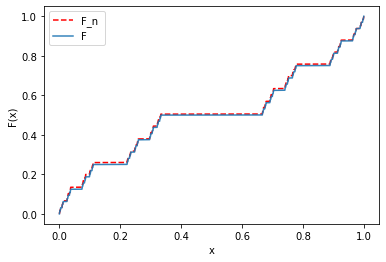

In [554]:
#F(x)
n = 10000#количество точек разбиения
x, F = Canrnd(n)
x = np.sort(x)
F = np.sort(F)
d = Canrnd_n(n)
plt.plot(x,d,'r--',label = 'F_n ')
plt.plot(x,F,label = 'F', alpha = 0.9)
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.savefig('2_1.pdf')

In [555]:
#Проверка гипотез для серии
l = 10000
numb = 0
alpha = 0.95
for i in range(l):
    x, F = Canrnd(n)
    F = np.sort(F)
    d = Canrnd_n(n)
    D_n = np.max(np.abs(F - d))
    if np.sqrt(n)*D_n < K_alpha(alpha): numb += 1
print(numb)        

9528


### Задание №2.2

Text(0, 0.5, 'F(x)')

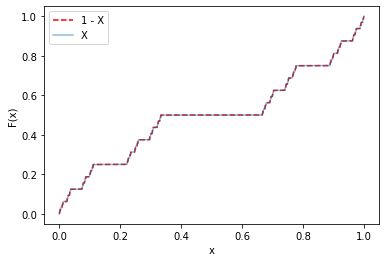

In [568]:
# распределения X и 1 - X и статистика Смирнова
n_x = 10000#количество точек для демонстрации 1 - X ~ X
x, F = Canrnd(n_x)
x_1 = np.sort(1 - x)
F_1 = np.sort(1 - F)
x = np.sort(x)
F = np.sort(F)
plt.plot(x_1,F_1,'r--',alpha = 1, label = "1 - X")
plt.plot(x,F,alpha = 0.5, label = "X")
plt.legend()
D_n_m = Smirnov_statistic(x,x_1)
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.savefig('2_3.pdf')

In [547]:
l = 100
numb = 0
alpha = 0.95
n_x = 1000
for i in range(l):
    x, F = Canrnd(n_x)
    x_1 = np.sort(1 - x)
    F_1 = np.sort(1 - F)
    x = np.sort(x)
    F = np.sort(F)
    D_n_m = Smirnov_statistic(x,x_1)
    if np.sqrt(n*m/(n+m))*D_n_m < K_alpha(alpha): numb += 1
print(numb)        

91


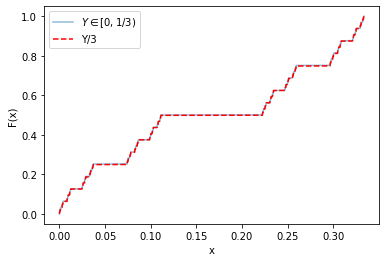

In [566]:
#Самоподобие Y/3 и Y \in [0,1/3)
n = 100000
x, F = Canrnd(n)
x = np.sort(x)
F = np.sort(F)
x_1 = x[x < 1/3]
x_2 = x/3
plt.plot(x_1,Canrnd_n(x_1.size),alpha = 0.5, label = '$Y \in [0,1/3)$')
plt.plot(x_2,Canrnd_n(x_2.size), 'r--',alpha = 1,label = 'Y/3')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.savefig('2_4.pdf')

In [541]:
l = 1000
numb = 0
alpha = 0.95
n_1 = 1000
for i in range(l):
    x, F = Canrnd(n_1)
    x_1 = x/3
    x_2 = x[x < 1/3]
    x_1, x_2 = np.sort(x_1), np.sort(x_2)
    D_n_m = Smirnov_statistic(x_1,x_2)
    n = len(x)
    m = len(x_1)
    if np.sqrt(n*m/(n+m))*D_n_m < K_alpha(alpha): numb += 1
print(numb)        

868


### Задание №2.3

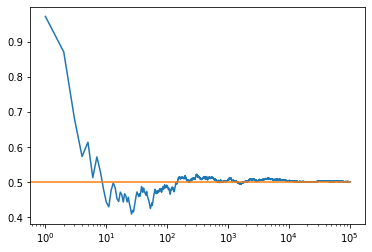

In [569]:
#Расчет математического ожидания и дисперсии СВ
x, F = Canrnd(n)#теоретическое
x_1 = Canrnd_n(n)#эмпирическое
vec = np.arange(1,len(x_1) + 1,1)
Ex_emp = np.cumsum(x)/vec
Dx_emp = np.cumsum(x**2)/vec - Ex_emp**2
plt.semilogx(vec, Ex_emp)
plt.semilogx([0,vec[-1]],[1/2,1/2])
#plt.savefig('2_5.eps')

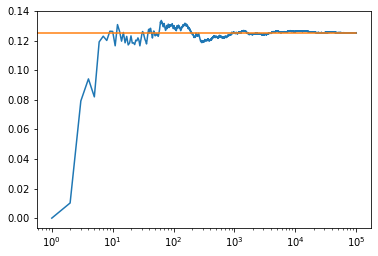

In [570]:
plt.semilogx(vec,Dx_emp)
plt.semilogx([0,vec[-1]],[0.125,0.125])
#plt.savefig('2_6.eps')

# Задание №3

### Блок обработки

In [358]:
#Генератор СВ равномерного распределения
def Urnd(varargin):
    return uniform.rvs(size = varargin)

In [359]:
#Генератор СВ экспоненциального распеределения
def Exprnd(lamb, varargin):
    return -(1/lamb)*np.log(1 - Urnd(varargin))

In [382]:
#Датчик Пуассоновского распределения на основе датчика экспоненциального
def Puassrnd(lamb,varargin):
    ans = np.array([])
    for i in range(n_cross):
        exprnd = Exprnd(lamb,varargin)
        mas_s = np.cumsum(exprnd)
        n_mas = np.argwhere(mas_s < 1)
        if n_mas.size < 1:
            ans = np.append(ans,0)
        else:
            ans = np.append(ans,np.max(n_mas) + 1)     
    return ans    

In [361]:
#Датчик Нормального распределения через метод моделирования с.в. парами с переходом в полярные координаты
def Normrndpar(varagrin):
    lamb = 0.5
    a = 0
    b = 2*np.pi
    z_1 = []
    z_2 = []
    omega_m = Exprnd(lamb, varagrin)
    fi_m = uniform.rvs(size = varagrin,loc = 0, scale = b)
    ksi = np.sqrt(omega_m)*np.cos(fi_m)
    nu = np.sqrt(omega_m)*np.sin(fi_m)
    return [ksi, nu]


In [362]:
def Bin(n,p):
    mas = np.zeros(n)
    for i in range(n):
        mas[i] = sum(Bernrnd(p,n))
    return mas

In [363]:
#Статистика Пирсона
def Pierson(lamb, n, num):
    k = 20
    binrv = Bin(n,lamb/n)
    brv_max = np.max(binrv)
    poisrv = np.zeros(k)
    n_k = np.zeros(k)
    chi_sq = 0
    #poisrv = Puassrnd(lamb, k)
    for i in range(k):
        poisrv[i] = (lamb**i)*np.exp(-lamb)/factorial(i)
        for j in range(num):
            if binrv[j] == i:
                n_k[i] += 1            
    for i in range(int(brv_max)):
            chi_sq += ((n_k[i]/num - poisrv[i])**2)/poisrv[i]
    chi_sq = chi_sq*num
    return chi_sq

In [364]:
def T_Student(X):
    return [np.sum(X)/len(X),np.sum((X - np.sum(X)/len(X))**2)/(len(X) - 1)]

### Блок вывода/визуализации

### Задание №3.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


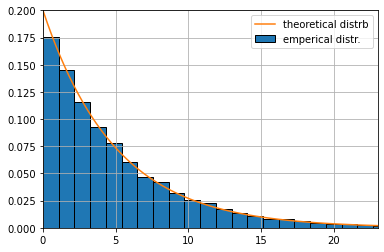

In [272]:
#Построить датчик экспоненциального распределения
lamb_exp = 1/5 #параметр lambda для Экспоненциального генератора
n_cross = 10000
d = Exprnd(lamb_exp,n_cross)
x = np.linspace(0,30,100)
y = lamb_exp*np.exp(-lamb_exp*x)
plt.hist(d,40,density = 1,label = 'emperical distr.',edgecolor = 'black')
plt.plot(x,y, label = 'theoretical distrb')
plt.grid(True)
plt.legend()

alpha = 0.99
plt.axis([0,-1/lamb_exp * np.log(1 - alpha),0,0.2])# F^(-1)(\alpha) = -1/lamb_exp ln(1 - \alpha)
#plt.savefig('3_1.eps')

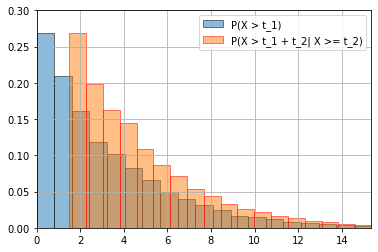

In [277]:
#Свойство отсутствия памяти
lamb_exp = 0.3
z = Exprnd(lamb_exp,n_cross)
t_1 = 1.5
t_2 = 0
z = np.delete(z,np.where(z < t_2))
plt.hist(z,40,density=1, alpha = 0.5, label = 'P(X > t_1)', edgecolor = 'black')
z = np.delete(z,np.where(z < t_1 + t_2))
plt.hist(z,40,density=1, alpha = 0.5, label = 'P(X > t_1 + t_2| X >= t_2)', edgecolor = 'red')
plt.legend()
plt.grid(True)
alpha = 0.99
plt.axis([0,-1/lamb_exp * np.log(1 - alpha),0,0.3])#
#plt.savefig('3_2.pdf')

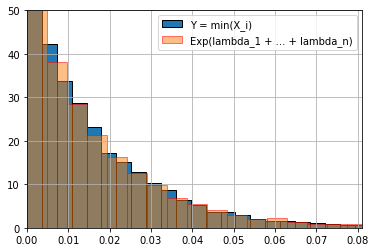

In [278]:
#Найти распределение С.В. Y = min(X_1,X_2,...,X_n)
lamb_mas = 10*np.random.rand(n)#набор lamda(Задание №3.1)(0 < lambda < 10)
n = 10 #количество случайных величин(Задание №3.1)
z = []
for i in range(n_cross):
    Y = np.min(Exprnd(lamb_mas,n))
    z.append(Y)
plt.hist(z,40,density = 1, edgecolor = 'black',label = 'Y = min(X_i)')
lamb_sum = np.sum(lamb_mas)
z = Exprnd(lamb_sum, n_cross)
plt.hist(z,40,density = 1, alpha = 0.5, edgecolor = 'red', label = 'Exp(lambda_1 + ... + lambda_n)')
plt.grid(True)
plt.legend()
alpha = 0.99
plt.axis([0,-1/lamb_sum * np.log(1 - alpha),0,50])#
#plt.savefig('3_3.pdf')

### Задание №3.2

(0.0, 8.0, 0.0, 0.34)

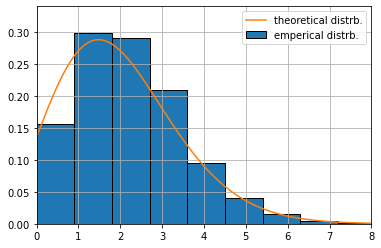

In [384]:
#Датчик распределения Пуассона на основе экспоненциального
lamb_puasson = 2#параметр lambda для распределения Пуассона
z = Puassrnd(lamb_puasson, 10000)
plt.hist(z,density = 1, edgecolor = 'black',label = 'emperical distrb.')
x = np.linspace(0,10,100)
y = (np.exp(-lamb_puasson)*lamb_puasson**x)/factorial(x)
plt.plot(x,y,label = 'theoretical distrb.')
plt.legend()
plt.grid(True)
plt.axis([0,4*lamb_puasson,0,0.34])#
#plt.savefig('3_4.eps')

### Задание №3.3

(0.0, 8.0, 0.0, 0.34)

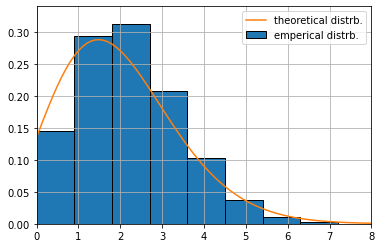

In [389]:
#Датчик распределения Пуассона как предел биномиального распределения
n_puass = 30
z = Binomial(lamb_puasson/n_puass, n_puass,n_cross)
plt.hist(z,density = 1, edgecolor = 'black', label = 'emperical distrb.')
x = np.linspace(0,10,100)
y = (np.exp(-lamb_puasson)*lamb_puasson**x)/factorial(x)
plt.plot(x,y,label = 'theoretical distrb.')
plt.grid(True)
plt.legend()
plt.axis([0,4*lamb_puasson,0,0.34])#
#plt.savefig('3_5.eps')

### Задание №3.4

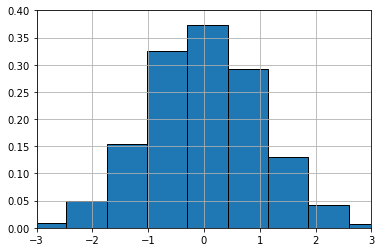

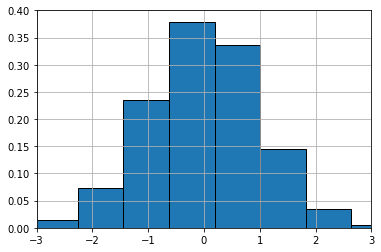

In [127]:
#Датчик стандартного нормального распределения методом моделирования с.в. парами с переходом в полярные координаты
z = Normrndpar(n_cross)
fig = plt.figure()
n_norm_1 = plt.hist(z[0],density=1,edgecolor = 'black')
plt.grid(True)
plt.axis([-3,3,0,0.4])#
fig1 = plt.figure()
n_norm_2 = plt.hist(z[1],density=1,edgecolor = 'black')
plt.grid(True)
plt.axis([-3,3,0,0.4])#
#plt.savefig('3_6.eps')

In [619]:
#Проверка критерия t-Стьюдента
alpha = 0.05
X_m_cos, S_x_cos = T_Student(z[0])
X_m_sin, S_x_sin = T_Student(z[1])
t = (X_m_cos - X_m_sin)/np.sqrt(S_x_cos/len(z[0]) + S_x_sin/len(z[1]))
if (t >= stats.t.ppf(alpha/2,n_cross-1) and (t <= stats.t.ppf(1 - alpha/2,n_cross - 1))):
    print('YES')
else:
    print('NO')

YES


In [177]:
l = 1000
alpha = 0.05
n_cross = 10000
res = 0
for i in range(l):
    z = Normrndpar(n_cross)
    X_m_cos, S_x_cos = T_Student(z[0])
    X_m_sin, S_x_sin = T_Student(z[1])
    t = (X_m_cos - X_m_sin)/np.sqrt(S_x_cos/len(z[0]) + S_x_sin/len(z[1]))
    if (t >= stats.t.ppf(alpha/2,n_cross-1) and (t <= stats.t.ppf(1 - alpha/2,n_cross - 1))): res+= 1
print(res)    

944


In [620]:
#Проверка критерия Фишера
alpha = 0.95
sum_n_cos = np.sum(z[0])
sum_n_sin = np.sum(z[1])

X_cos = sum_n_cos/n_cross
X_sin = sum_n_sin/n_cross

S_cos = np.sum((z[0] - X_cos)**2)/(n_cross - 1)
S_sin = np.sum((z[1] - X_sin)**2)/(n_cross - 1)

F_0 = S_cos/S_sin

if (F_0 < f.ppf(alpha/2, n_cross - 1, n_cross - 1) and F_0 > f.ppf(1 - alpha/2, n_cross - 1, n_cross - 1)):
    print('YES')
else:
    print('NO')

NO


In [232]:
l = 1000
alpha = 0.05
n_cross = 1000
res = 0
for i in range(l):
    z = Normrndpar(n_cross)
    sum_n_cos = np.sum(z[0])
    sum_n_sin = np.sum(z[1])

    X_cos = sum_n_cos/n_cross
    X_sin = sum_n_sin/n_cross

    S_cos = np.sum((z[0] - X_cos)**2)/(n_cross - 1)
    S_sin = np.sum((z[1] - X_sin)**2)/(n_cross - 1)

    F_0 = S_cos/S_sin
    
    if not (F_0 < f.ppf(alpha/2, n_cross - 1, n_cross - 1) or F_0 > f.ppf(1 - alpha/2, n_cross - 1, n_cross - 1)): res += 1
print(res)    

948


# Задание №4

### Блок обработки

In [482]:
#Генератор с.в. Коши
def Cauchyrnd(x_0,ips,varargin):
    #F^(-1)(Y ~ U(0,1)) = X - с.в. Коши
    #x = uniform.rvs(size = varargin)
    x = np.random.rand(varargin)
    ans = x_0 + ips*np.tan(np.pi*(x - 1/2))
    return ans

In [397]:
#Генератор нормального распределение с помощью метода Фон-Неймана(алгоритм взят с лекций)
def Normfnrnd(n,a = 0, b = 1):
    d = np.array([])
    while d.size < n:
        X = Cauchyrnd(a,b,1)
        p = np.exp(1/2)*(1/2)*np.exp(-(X**2)/2)*(X**2 + 1)
        if Bernrnd(p,1):
            d = np.append(d,X[0])        
    return d    

### Блок вывода/визуализации

### Задание №4.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


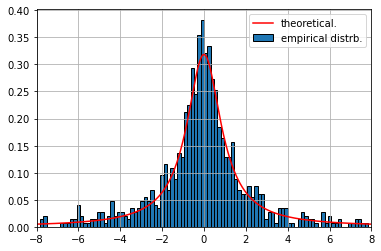

In [472]:
#Датчик распределения Коши
x_0 = 0
ips = 1
n = 1000
z = Cauchyrnd(x_0,ips,n)
plt.hist(z, density=1, bins=100, range=(-8, 8),edgecolor = 'black', label='empirical distrb.')
x_ls = np.linspace(-8,8,1000)
plt.plot(x_ls,cauchy.pdf(x_ls), 'red', label = 'theoretical.')
plt.legend()
plt.grid(True)
plt.xlim([-8,8])
#plt.savefig('4_1.eps')

### Задание №4.2

(-3.0, 3.0)

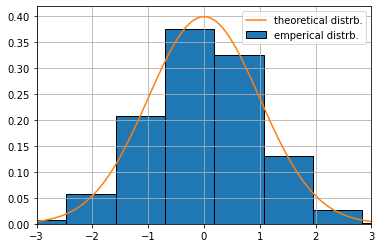

In [393]:
n_cross = 10000
mu = 0
sigma = 1
z = Normfnrnd(n_cross)
fig = plt.figure()
plt.hist(z,10,density=1,edgecolor = 'black',label = 'emperical distrb.')
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,norm.pdf(x,mu,sigma), label = 'theoretical distrb.')
plt.legend()
plt.grid(True)
plt.xlim([mu - 3*sigma,mu + 3*sigma])
#plt.savefig('4_2.eps')

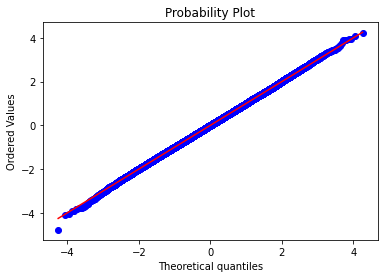

In [43]:
probplot(z, plot = plt)
#plt.show()
#plt.savefig('4_3.eps')

### Задание №4.3

In [34]:
n = 10000
start_time = time()
z = Normfnrnd(n)
print('n =',n,'; von Neumann time:',time() - start_time)
start_time = time()
z = Normrndpar(n)
print('n =',n,'; Polar time:',time() - start_time)

n = 10000 ; Fon-Neyman time: 2.1496410369873047
n = 10000 ; Polar time: 0.0026082992553710938


# Задание №5

### Блок ввода параметров

In [484]:
n_cross = 10000
mu = 0
sigma_2 = 1 
a = 0#кф. сдвига Коши
b = 1.5#кф. масштаба Коши

### Блок обработки

In [473]:
#ЗБЧ
def Lln_n(varargin,mu,sigma_2):
    z = norm(loc = mu, scale = sigma_2).rvs(size = varargin)
    z = np.cumsum(z)
    i_n = np.linspace(1,varargin,varargin)
    z = z/i_n
    plt.semilogx(i_n,z)
    ones = np.ones(varargin)
    plt.semilogx(i_n,mu*ones)
    plt.grid(True)

In [476]:
#ЦПТ
def Clt_n(varargin,mu,sigma_2):
    m = 1000
    res = np.zeros(m)
    for i in range(m):
        z = norm.rvs(loc = mu,scale = sigma_2,size = varargin)
        res[i] = np.sum(z)
    res = res/varargin    
    res = (res - mu)*np.sqrt(varargin)
    plt.hist(res,40,density=1,edgecolor = 'black',label = 'empirical.')

In [49]:
def Cauchy(a,b,x):
    return a + b*np.tan((x - 0.5)*np.pi)


In [50]:
def Norm_an(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))

### Блок вывода/визуализации

### Задание №5.1

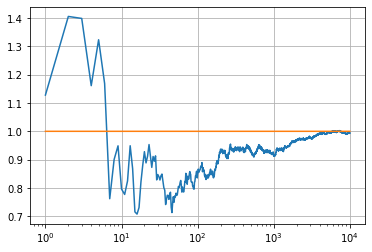

In [87]:
#Иллюстрация ЗБЧ
Lln_n(n_cross,mu,sigma_2)
#plt.savefig('5_2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


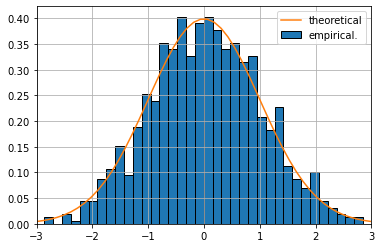

In [478]:
#Иллюстрация ЦПТ
Clt_n(n_cross,mu,sigma_2)
x = np.linspace(-3,3,50)
plt.plot(x,Norm_an(x,mu,np.sqrt(sigma_2)),label = 'theoretical')
plt.grid(True)
plt.xlim([mu - 3*sigma_2,mu + 3*sigma_2])
plt.legend()
#plt.savefig('5_3.eps')

### Задание №5.2

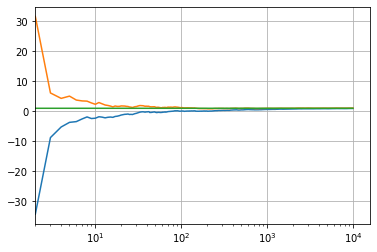

In [93]:
#Доверительный интервал для мат. ожидания
mu = 1
sigma = 3
n = 10000
alpha_1 = 0.05
n_rnd = norm.rvs(mu, sigma, size = n)
n_grid = np.arange(1,n + 1)
EX = np.cumsum(n_rnd)/n_grid
DX = np.cumsum(n_rnd**2)/n_grid - EX**2
t = stats.t.ppf(1-alpha_1/2,np.arange(0,n)) 
mu_l = EX - (np.sqrt(DX)/np.sqrt(n_grid))*t
mu_u = EX + (np.sqrt(DX)/np.sqrt(n_grid))*t
plt.semilogx(n_grid,mu_l,n_grid,mu_u,np.ones(n)*mu)
plt.xlim(left = 2)
plt.grid(True)
#plt.savefig('5_4.eps')

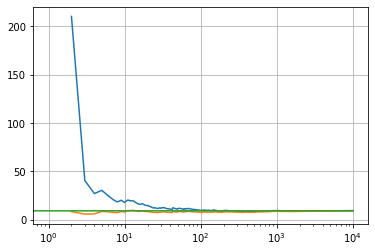

In [102]:
#Доверительный интервал для дисперсии
alpha_2 = 0.6
chi_1 = chi2.ppf((1 - alpha_2)/2,np.arange(0,n))
chi_2 = chi2.ppf((1 + alpha_2)/2,np.arange(0,n))
sigma_l = np.arange(0,n)*DX/chi_1
sigma_u = np.arange(0,n)*DX/chi_2
plt.semilogx(n_grid, sigma_l, n_grid, sigma_u, np.ones(n)*sigma**2)
plt.grid(True)
#plt.savefig('5_5.eps')

### Задание №5.3

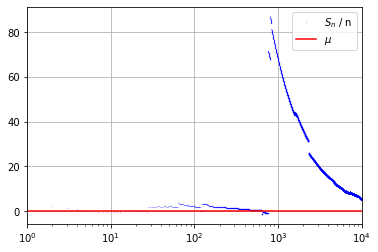

In [511]:
z = Cauchyrnd(a,b,n_cross)
z = np.cumsum(z)
i_n = np.linspace(1,n_cross,n_cross)
z = z/i_n
plt.semilogx(i_n,z,'b.',ms = 0.2,label = '$S_n$ / n')
plt.plot(i_n,a*np.ones(n_cross), 'red', label = '$ \mu$ ')
plt.grid(True)
plt.xlim(left = 1, right = 10000)
plt.legend()
#plt.savefig('5_1.pdf')

# Задание №6

### Блок обработки

In [103]:
#Функция f(x) для метода Монте-Карло
def F_m_c(x):
    return (np.pi**5) * np.exp(-1/((2**7)*np.prod(x)**2))/np.prod(x)**2

In [104]:
#Функция с произведенной заменой для метода квадратур
def F_s_m(x):
    return (np.pi**10) * np.exp(-(sum(np.tan((np.pi/2)*x)**2) + 1/2**7*(np.prod((1/np.tan((np.pi/2)*x))**2))))/np.prod(np.sin((np.pi/2)*x)**2)

In [590]:
def F_coef(x):
    return int(np.math.factorial(x.sum())/ np.array([np.math.factorial(i) for i in x]).prod())

In [606]:
def F_s_m_2(x):
    return np.exp(-(np.tan(x)**2).sum() - np.prod(1/(np.tan(x)**2)) / 128) * np.prod(1 / (np.sin(x))**2)

In [616]:
def Next_s(x,n):
    for i in range(-1, -len(x) - 1,-1):
        if x[i] < m - 1:
            x[i:] = (x[i] + 1) * np.ones(x[i:].size)
            return x
    return -1  

### Блок вывода/визуализации

### Задание №6.1-6.2


In [117]:
#Метод Монте-Карло
n_m_c = 100000 #количество итераций в методе Монте-Карло
S_n = 0
alpha = 0.99
sigma = 0
start_time = time()
for i in range(n_m_c):
    ksi = np.random.normal(0, np.sqrt(1/2), size = 10)
    F = F_m_c(ksi)
    S_n += F
    sigma += F**2
end_time = time() - start_time    
integral = S_n/n_m_c    
print('integral = ', integral)
x_p = norm.ppf((1 + alpha)/2, 0, 1)
eps = x_p * np.sqrt(sigma/n_m_c - integral**2)/np.sqrt(n_m_c)
print('error = ', eps)
print('time = ', end_time,';', 'number of iterations = ', n_m_c)

integral =  124.86308710923917
error =  0.2935009125929374
time =  2205.1636378765106 ; number of iterations =  100000000


In [619]:
'''
#Метод Квадратур
n_s_m = 10 #количество итераций в методе квадратур 
n_k = 5
x = np.zeros(n_s_m)
Sum = 0
delta = (n_k - 1)**(-n_s_m)
x_ls = np.linspace(0,1,n_k) + 1/(2*(n_k - 1))
start_time = time()
for i in range(n_k):
    x[0] = x_ls[i]
    for i in range(n_k):
        x[1] = x_ls[i]
        for i in range(n_k):
            x[2] = x_ls[i]
            for i in range(n_k):
                x[3] = x_ls[i]
                for i in range(n_k):
                    x[4] = x_ls[i]
                    for i in range(n_k):
                        x[5] = x_ls[i]
                        for i in range(n_k):
                            x[6] = x_ls[i]
                            for i in range(n_k):
                                x[7] = x_ls[i]
                                for i in range(n_k):
                                    x[8] = x_ls[i]
                                    for i in range(n_k):
                                        x[9] = x_ls[i]
                                        Sum += F_s_m(x)
end_time = time() - start_time
integral = Sum*delta
print('integral = ', integral)
print('time = ', end_time, ';', 'number of iterations = ', n_k)
'''

"\n#Метод Квадратур\nn_s_m = 10 #количество итераций в методе квадратур \nn_k = 5\nx = np.zeros(n_s_m)\nSum = 0\ndelta = (n_k - 1)**(-n_s_m)\nx_ls = np.linspace(0,1,n_k) + 1/(2*(n_k - 1))\nstart_time = time()\nfor i in range(n_k):\n    x[0] = x_ls[i]\n    for i in range(n_k):\n        x[1] = x_ls[i]\n        for i in range(n_k):\n            x[2] = x_ls[i]\n            for i in range(n_k):\n                x[3] = x_ls[i]\n                for i in range(n_k):\n                    x[4] = x_ls[i]\n                    for i in range(n_k):\n                        x[5] = x_ls[i]\n                        for i in range(n_k):\n                            x[6] = x_ls[i]\n                            for i in range(n_k):\n                                x[7] = x_ls[i]\n                                for i in range(n_k):\n                                    x[8] = x_ls[i]\n                                    for i in range(n_k):\n                                        x[9] = x_ls[i]\n          

In [620]:
n_s_m = 10
i_n = np.zeros(10, dtype = int)
s = np.pi / (2 * n_s_m) 
x = s * (np.arange(0,m) + 1/2)
integral = 0
ns = np.zeros(m, dtype = int)
start_time = time()
while True:
    for i in range(n_s_m):
        ns[i] = (i_n == i).sum()
    integral += F_coef(ns) * F_s_m_2(x[i_n.astype(int)]) 
    i_n = Next_s(i_n,m)
    if np.prod(i_n == -1):
        break
end_time = time() - start_time
integral *= 1024 * s**10
print('integral= ', integral)
print('time = ', end_time)

integral=  124.70401296577288
time =  15.452032804489136
